## Name: Bhumi Koli 
## Roll no: 34  Class: SE_AIML B-2
## Expt.-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

# OSL

In [1]:
#Step 1: Import libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  

In [14]:
#Step 2: Input data
X = np.array([1, 2, 3]).reshape(-1, 1)  # input
Y = np.array([2, 3, 5])  # output
print(X.shape)

(3, 1)


In [15]:
#Step 2: Input data
X = np.array([10, 20, 30, 50]).reshape(-1, 1)  # input
Y = np.array([12, 21, 29, 48])  # output
print(X.shape)
#Step 3: Create and fit the model
model = LinearRegression()  
model.fit(X, Y)
#Step 4: Get coefficients (MlE estimates)
w= model.coef_[0]
b = model.intercept_
print(f"w (slope) = {w}")
print(f"b (intercept) = {b}")
#Step 5: Make predictions
Y_pred = model.predict(X)
print("\n Predictions for training data:")
for xi, yi, ypi in zip(X.flatten(), Y, Y_pred):
    print(f"X={xi}, Actual sales={yi}, Predicted sales={ypi:.2f}")
# Step 7: Calculate metrics
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print (f"\n Mean Squared Error(MSE) = {mse:.4f}")
print(f"R² = {r2:.4f}") 

(4, 1)
w (slope) = 0.8971428571428574
b (intercept) = 2.828571428571422

 Predictions for training data:
X=10, Actual sales=12, Predicted sales=11.80
X=20, Actual sales=21, Predicted sales=20.77
X=30, Actual sales=29, Predicted sales=29.74
X=50, Actual sales=48, Predicted sales=47.69

 Mean Squared Error(MSE) = 0.1857
R² = 0.9989


In [9]:
#Step 3: Create and fit the model
model = LinearRegression()  
model.fit(X, Y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
#Step 4: Get coefficients (MlE estimates)
w= model.coef_[0]
b = model.intercept_
print(f"w (slope) = {w}")
print(f"b (intercept) = {b}")

w (slope) = 1.4999999999999993
b (intercept) = 0.3333333333333348


In [16]:
#Step 5: Make predictions
Y_pred = model.predict(X)
print("\n Predictions for training data:")
for xi, yi, ypi in zip(X.flatten(), Y, Y_pred):
    print(f"X={xi}, Actual sales={yi}, Predicted sales={ypi:.2f}")    


 Predictions for training data:
X=10, Actual sales=12, Predicted sales=11.80
X=20, Actual sales=21, Predicted sales=20.77
X=30, Actual sales=29, Predicted sales=29.74
X=50, Actual sales=48, Predicted sales=47.69


In [17]:
# Step 7: Calculate metrics
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print (f"\n Mean Squared Error(MSE) = {mse:.4f}")
print(f"R² = {r2:.4f}")


 Mean Squared Error(MSE) = 0.1857
R² = 0.9989


# MLE

In [19]:
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score  

In [20]:
X = np.array([1, 2, 3]).reshape(-1, 1)  # input
Y = np.array([2, 3, 5])  # output
print(X.shape)

(3, 1)


In [21]:
# Negative log-likelihood function
def neg_log_likelihood(params):
    w, b = params
    sigma2 =1 # Assume variance of 1 for simplicity
    Y_pred = w*X + b
    nll = 0.5 * np.sum((Y - Y_pred)**2 / sigma2) # -log likelihood up to constant
    return nll

In [23]:
#Initial guess for w, b
initial_guess = [0, 0]
 
# Minimize negative log-likelihood
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"MLE w={w_mle}")
print(f"MLE b={b_mle}")

MLE w=-8.3681841778443e-08
MLE b=3.3333335569014952


In [25]:
#Step 6: Make predictions 
# Make predictions using MLE estimates
Y_pred = w_mle*X + b_mle
print("\n Predictions for training data:")
for xi, yi, ypi in zip(X, Y, Y_pred):
    print(f"X={xi.item()}, Actual={yi}, Predicted={ypi.item():.2f}")


 Predictions for training data:
X=1, Actual=2, Predicted=3.33
X=2, Actual=3, Predicted=3.33
X=3, Actual=5, Predicted=3.33


# GD

In [31]:
# gradient descent 
w, b = 0, 0
alpha = 0.0001
n_iter = 1000
n = len(X)

for i in range(n_iter):
    Y_pred = w*X.flatten() + b
    dw = (-2/n) * np.sum(X.flatten() * (Y - Y_pred))
    db = (-2/n) * np.sum(Y - Y_pred)
    w -= alpha * dw
    b -= alpha * db
    
print("Slope(w):", w)
print("Intercept(b):", b)

Slope(w): 0.9277932204091286
Intercept(b): 0.4003820339618283


In [30]:
Y_pred = w*X + b
print("\n Predictions for training data:")
for xi, yi, ypi in zip(X, Y, Y_pred):
    print(f"X={xi.item()}, Actual={yi}, Predicted={ypi.item():.2f}")


 Predictions for training data:
X=1, Actual=2, Predicted=1.33
X=2, Actual=3, Predicted=2.26
X=3, Actual=5, Predicted=3.18


In [32]:
# Step 7: Calculate metrics
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print (f"\n Mean Squared Error(MSE) = {mse:.4f}")
print(f"R² = {r2:.4f}")


 Mean Squared Error(MSE) = 1.4376
R² = 0.0758


## GD with single parameters

In [33]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
X = np.array([1, 2, 3])
Y = np.array([2, 3, 5])
print(X.shape)

(3,)


In [ ]:
#loss function J(w1)
def loss(w1):
    w0 = np.mean(Y) - w1 * np.mean(X)
    Y_pred = w1 * X + w0
    return np.sum((Y - Y_pred) ** 2)

In [36]:
#Gradient of 3 w.r.t w1
def gradient(w1):
    w0 = np.mean(Y) - w1 * np.mean(X)
    Y_pred = w1*X + w0
    return -2 * np.sum((Y - Y_pred) * X)

In [37]:
#gradient descent

lr= 0.01
w1 = 4
iterations = 15

w1_value = []
loss_value = []
for i in range(iterations):
    w1_value.append(w1)
    loss_value.append(loss(w1))
    grad = gradient(w1)
    w1 = w1 - lr * grad

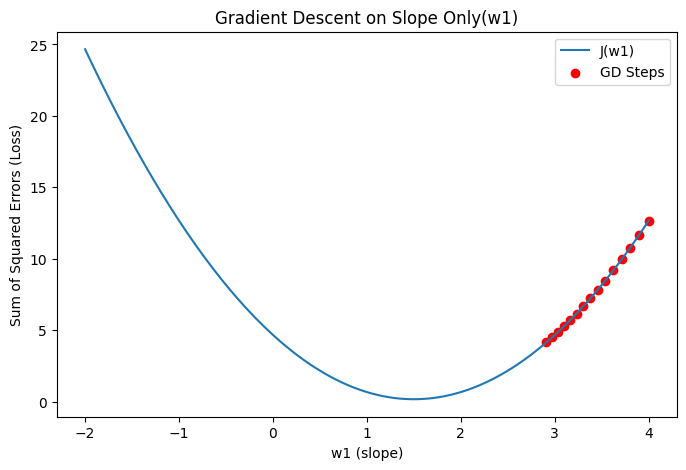

In [38]:
#plot loss curve

w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(8, 5))
plt.plot(w_space, loss_space, label='J(w1)')
plt.scatter(w1_value, loss_value, color='red', label='GD Steps')
plt.xlabel("w1 (slope)")
plt.ylabel("Sum of Squared Errors (Loss)")
plt.title("Gradient Descent on Slope Only(w1)")
plt.legend()